# Predicting The Weather Using Machine Learning

In [1]:
import pandas as pd
weather = pd.read_csv("local_weather.csv", index_col="DATE")

## Exploratory Analysis Data phase
Check the percentage of NaN values ​​in each column

In [2]:
#percentege of NaN values in wich column
weather.isnull().sum()/weather.shape[0]*100

STATION     0.000000
NAME        0.000000
ACMH       67.320919
ACSH       67.320919
AWND       49.253481
DAPR       99.955265
FMTM       87.753733
FRGT       99.988816
MDPR       99.955265
PGTM       52.368171
PRCP        1.588100
SNOW       36.364145
SNWD       35.670749
TAVG       88.609294
TMAX        0.061511
TMIN        0.078287
TSUN       93.563720
WDF1       67.320919
WDF2       49.247889
WDF5       49.745568
WDFG       76.139350
WSF1       67.320919
WSF2       49.242297
WSF5       49.745568
WSFG       76.139350
WT01       77.665940
WT02       98.031650
WT03       99.250685
WT04       99.977632
WT05       99.837835
WT07       99.988816
WT08       81.803948
WT09       99.988816
WT16       89.067830
WT18       99.983224
dtype: float64

#### Copy the data to another dataframe with only the most important columns, according to the dataset documentation.

In [3]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

#### Rename columns for better overall understanding.

In [4]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

#### Check the percentage of "NaN" values ​​for the new dataset

In [5]:
core_weather.isnull().sum()/core_weather.shape[0]*100

precip         1.588100
snow          36.364145
snow_depth    35.670749
temp_max       0.061511
temp_min       0.078287
dtype: float64

#### Presence of many 0.0 values ​​detected in the "snow" and "snow_depth" columns. Therefore, it was decided to exclude them

In [6]:
core_weather["snow"].value_counts()

snow
0.0     11379
25.0        1
Name: count, dtype: int64

In [7]:
del core_weather["snow"]

In [8]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0    11504
Name: count, dtype: int64

In [9]:
del core_weather["snow_depth"]

#### Check "NaN" values ​​in the "price" column

In [10]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,19.4,13.9
1983-10-30,NaN,21.1,17.2
1983-10-31,NaN,20.6,16.1
1983-11-12,NaN,17.2,12.8
1983-11-13,NaN,15.6,10.0
...,...,...,...
2016-05-08,NaN,19.4,13.3
2017-10-28,NaN,20.0,10.0
2023-03-29,NaN,11.1,6.1


#### Check how many days there was zero precipitation to decide how to replace missing data for that column

In [11]:
core_weather["precip"].value_counts()

precip
0.0     14539
0.3       447
0.5       205
0.8       126
1.0       106
        ...  
26.7        1
35.1        1
49.5        1
51.1        1
32.5        1
Name: count, Length: 182, dtype: int64

#### Of the non-missing data, 14823 days had zero or very close to zero precipitation. Therefore, we decided to replace the missing precipitation data with zero.

In [12]:
core_weather["precip"] = core_weather["precip"].fillna(0)

#### Apply the same missing data analysis to the "temp_max" and "temp_min" columns. Decide which strategy to use to treat them.

In [13]:
core_weather["temp_max"].isnull().sum()

11

In [14]:
core_weather["temp_min"].isnull().sum()

14

In [15]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,16.1,NaN
2011-12-22,0.0,16.7,NaN
2011-12-23,0.0,13.3,NaN
2011-12-24,0.0,12.8,NaN
2011-12-25,0.0,12.2,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [16]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,10.0
2019-04-21,0.0,NaN,11.1
2019-04-22,0.0,NaN,10.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,13.3


#### Due to the amount of missing values ​​in the temp_max and temp_min columns is very small (less than 0.61%) we decided to fill the missing values ​​with the immediately preceding non-missing values ​​and use them to fill the missing ones. Forward Fill Method.

In [17]:
# core_weather = core_weather.fillna(method="ffill") this comandline is deprecated
# new way of doing ffill on pandas:
core_weather = core_weather.ffill()

#### Check if there are still missing values ​​in the dataset.

In [18]:
core_weather.isnull().sum()/core_weather.shape[0]*100

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

#### Preparing for machine learning method



In [19]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10', '2024-11-11',
       '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-16'],
      dtype='object', name='DATE', length=17883)

#### We already noticed that all the data is of type float64, however, the date values ​​are not. So, let's transform them into datetime64.

In [20]:
core_weather.index = pd.to_datetime(core_weather.index)

In [21]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
               '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14',
               '2024-11-15', '2024-11-16'],
              dtype='datetime64[ns]', name='DATE', length=17883, freq=None)

#### The dataset documentation says that in the 90s, values ​​9999 indicate missing data. So we need to check.

In [22]:
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

#### Some graphs to check data consistency

<Axes: xlabel='DATE'>

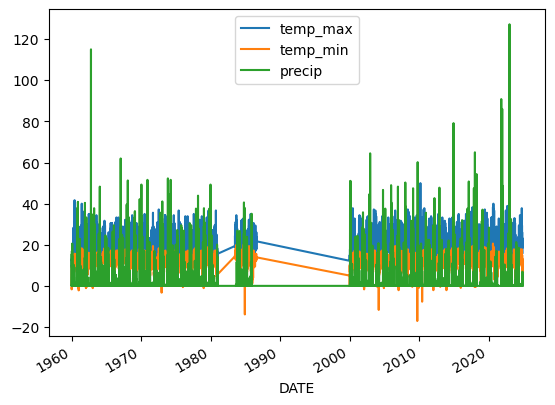

In [23]:
core_weather[["temp_max","temp_min","precip"]].plot()

#### We noticed a strange gap between 1985 and 2000. Let's investigate and decide whether to address this gap or continue without this data for the machine learning process. Note below that few intirely years are missing, what causes the gap (1981, 1982, 1987-1999, and so on...).

In [24]:
core_weather.index.year.value_counts().sort_index()

DATE
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    321
Name: count, dtype: int64

In [25]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1960    355.8
1961    352.5
1962    571.6
1963    485.9
1964    428.2
1965    414.5
1966    333.2
1967    609.5
1968    437.0
1969    653.2
1970    643.1
1971    270.3
1972    414.0
1973    746.2
1974    428.9
1975    446.1
1976    219.7
1977    297.6
1978    573.6
1979    604.4
1980    345.3
1983    181.3
1984    407.5
1985    216.5
1986      0.0
2000    536.8
2001    581.3
2002    486.2
2003    289.2
2004    330.1
2005    696.7
2006    579.6
2007    325.4
2008    353.4
2009    371.1
2010    576.8
2011    408.8
2012    582.8
2013    124.2
2014    498.7
2015    218.1
2016    502.7
2017    593.5
2018    427.6
2019    508.4
2020    163.0
2021    529.3
2022    390.9
2023    533.0
2024    328.6
Name: precip, dtype: float64

## Machine Learning phase

Let's try to predict tomorrow's maximum temperature. So we need to create a target column with the maximum temperature of the next day to use as a target for our model to learn from. Data is in metric unit Celsius.

In [26]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [27]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,9.4,-1.1,9.4
1960-01-02,0.0,9.4,-1.7,12.2
1960-01-03,0.0,12.2,1.7,12.2
1960-01-04,0.0,12.2,2.2,12.8
1960-01-05,0.0,12.8,0.6,11.7
...,...,...,...,...
2024-11-12,0.0,17.8,8.9,18.3
2024-11-13,0.0,18.3,7.2,17.2
2024-11-14,4.3,17.2,8.9,16.1


In [28]:
# getting rid of last line due to the NaN value
core_weather = core_weather.iloc[:-1].copy()

## Training and evaluating the model

In [29]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [30]:
predictors = ["precip","temp_max","temp_min"]

In [31]:
# Training with data from 1960 to 2022
train = core_weather.loc[:"2022-12-31"]

In [32]:
# Test with data from 2023 onwards, until the last day of registration (2024-11-16).
test = core_weather.loc["2023-01-01":]

#### Training the model with the columns "precip","temp_max","temp_min" from the list "predictors" trying to predict the column "target" from the same list.

In [33]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

#### Building a list of predictions made by the model

In [34]:
predictions = reg.predict(test[predictors])

#### Evaluating the model. On average, our model is off by 1.87 degrees Celsius. Not a bad place to start.

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target"], predictions)

1.8731246433611906

In [62]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual","predictions"]

<Axes: xlabel='DATE'>

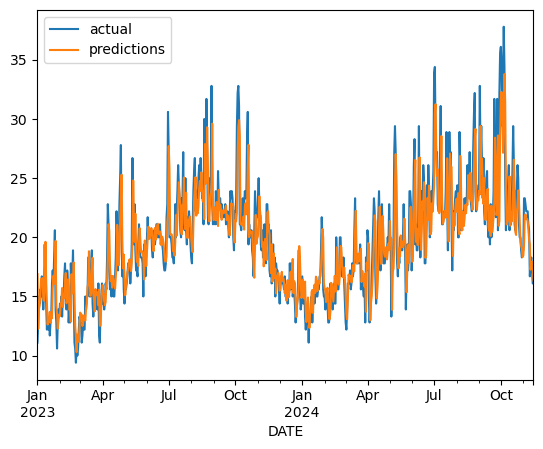

In [63]:
combined.plot()

#### Evaluating the regression coefficients (r²) to verify how each input variable (precip, temp_max, temp_min) influenced the model.

In [64]:
reg.coef_

array([-0.01940082,  0.54369363,  0.02352511,  0.18776989, -1.72153083,
       -0.01068526,  0.07361464,  0.07361464,  0.08407699])

#### Creating a python function to make predictions process more convenient

In [65]:
def create_predictions (predictors, core_weather, reg):
    train = core_weather.loc[:"2022-12-31"]
    test = core_weather.loc["2023-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual","predictions"]
    return print(error), combined

### Creating new indicators

#### Creating a column with the average of "temp_max" for the last 30 days.

In [66]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

#### It is important to note that this indicator generates 30 initial lines with NaN values, since the average is calculated from 30 values. Therefore, it is necessary to remove the first 30 lines.

In [67]:
core_weather = core_weather.iloc[30:].copy()

In [68]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

#### Creating a column with the relationship between maximum and minimum temperature.

In [69]:
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [70]:
# Updating the predictors
predictors = ["precip","temp_max","temp_min", "month_max", "month_day_max", "max_min"]

#### Redoing the forecasts, now including the new indicators made.

In [71]:
import pandas as pd
import numpy as np

# Check for infinite values
print("Infinite values ​​in columns:")
print(core_weather.isin([np.inf, -np.inf]).sum())

# Check for very large values
print("\nVery large values ​​in columns:")
print((core_weather > np.finfo(np.float64).max).sum())

Infinite values ​​in columns:
precip              0
temp_max            0
temp_min            0
target              0
month_max           0
month_day_max       0
max_min            46
monthy_avg          0
day_of_year_avg     0
dtype: int64

Very large values ​​in columns:
precip              0
temp_max            0
temp_min            0
target              0
month_max           0
month_day_max       0
max_min            46
monthy_avg          0
day_of_year_avg     0
dtype: int64


In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Replace infinite values ​​with NaN
core_weather.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values ​​with the mean of the column
core_weather.fillna(core_weather.mean(), inplace=True)

# Scale the data
scaler = StandardScaler()
core_weather_scaled = pd.DataFrame(scaler.fit_transform(core_weather), columns=core_weather.columns)

print("\nDataFrame after cleaning and scaling:")
print(core_weather_scaled)

# Validate the data
print("\nRemaining infinite values ​​in columns:")
print(core_weather_scaled.isin([np.inf, -np.inf]).sum())

print("\nRemaining very large values ​​in columns:")
print((core_weather_scaled > np.finfo(np.float64).max).sum())


DataFrame after cleaning and scaling:
         precip  temp_max  temp_min    target  month_max  month_day_max  \
0     -0.249533 -1.282802 -1.108141 -0.939810  -0.930694       1.059629   
1     -0.249533 -0.939736 -1.561589 -0.446635  -0.952411       0.254329   
2     -0.249533 -0.446578 -0.521327 -0.446635  -0.936359      -0.575394   
3     -0.249533 -0.446578  0.225528 -0.939810  -0.920307      -0.555850   
4      0.442413 -0.939736  0.518935 -0.811156  -0.931638       0.283661   
...         ...       ...       ...       ...        ...            ...   
17817  1.197264 -0.446578  0.385568 -0.210768   0.959680       1.733111   
17818 -0.249533 -0.210720 -0.361287 -0.103556   0.881308       1.171130   
17819 -0.249533 -0.103512 -0.814734 -0.339422   0.859591       0.953470   
17820  0.652094 -0.339370 -0.361287 -0.575289   0.812379       1.336734   
17821 -0.249533 -0.575228 -0.814734 -0.575289   0.765166       1.772370   

        max_min  monthy_avg  day_of_year_avg  
0     -0.0090

In [73]:
error, combined = create_predictions(predictors, core_weather, reg)

1.8192411136158977


#### With the addition of these new indicators, we were able to reduce the error from 1,876 degrees Celsius to:

In [74]:
error

<Axes: xlabel='DATE'>

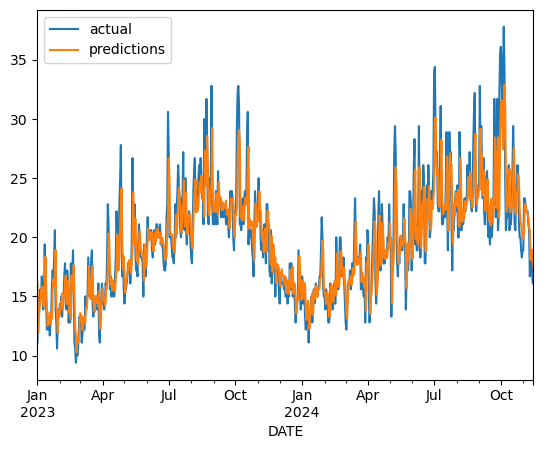

In [75]:
combined.plot()

#### We can try to create and add even more indicators.

In [76]:
core_weather["monthy_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).transform(lambda x: x.expanding(1).mean())

In [77]:
#Validating the column created
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthy_avg,day_of_year_avg
DATE,,,,,,,,,
1960-03-01,0.0,12.8,6.1,14.4,15.493333,1.210417,2.098361,12.800000,12.800000
1960-03-02,0.0,14.4,4.4,16.7,15.416667,1.070602,3.272727,13.600000,14.400000
1960-03-03,0.0,16.7,8.3,16.7,15.473333,0.926547,2.012048,14.633333,16.700000
1960-03-04,0.0,16.7,11.1,14.4,15.530000,0.929940,1.504505,15.150000,16.700000
1960-03-05,3.3,14.4,12.2,15.0,15.490000,1.075694,1.180328,15.000000,14.400000
...,...,...,...,...,...,...,...,...,...
2024-11-11,6.9,16.7,11.7,17.8,22.166667,1.327345,1.427350,17.227016,17.512245
2024-11-12,0.0,17.8,8.9,18.3,21.890000,1.229775,2.000000,17.227410,17.544898
2024-11-13,0.0,18.3,7.2,17.2,21.813333,1.191985,2.541667,17.228149,17.397959


In [78]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).transform(lambda x: x.expanding(1).mean())

In [79]:
# Updating the predictors
predictors = ["precip","temp_max","temp_min", "month_max", "month_day_max", "max_min", "monthy_avg", "monthy_avg", "day_of_year_avg"]

Conseguimos reduzir o erro de 1.819 para:

In [80]:
error, combined = create_predictions(predictors, core_weather, reg)

1.805348175647243


#### Evaluating the regression coefficients (r²) again to see how each input variable influenced the model. Now, with new variables created ("precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min", "monthy_avg", "monthy_avg", "day_of_year_avg"). We can see that the month_day_max indicator was the one that most influenced our model, with R² of -1.721.

In [81]:
reg.coef_

array([-0.01936982,  0.54339782,  0.02320916,  0.18800343, -1.72853228,
       -0.01073519,  0.07317781,  0.07317781,  0.08502958])

#### Checking the Pearson correlation of the "target" column with the other columns to suggest other starting points.

In [82]:
core_weather.corr()["target"]

precip            -0.206215
temp_max           0.822141
temp_min           0.597146
target             1.000000
month_max          0.689185
month_day_max     -0.420873
max_min           -0.108923
monthy_avg         0.691350
day_of_year_avg    0.713429
Name: target, dtype: float64

#### Plotting the correlation matrix to better visualize the relationship between the new indicators and the targuet column and suggest new hypotheses or modifications.

<Axes: >

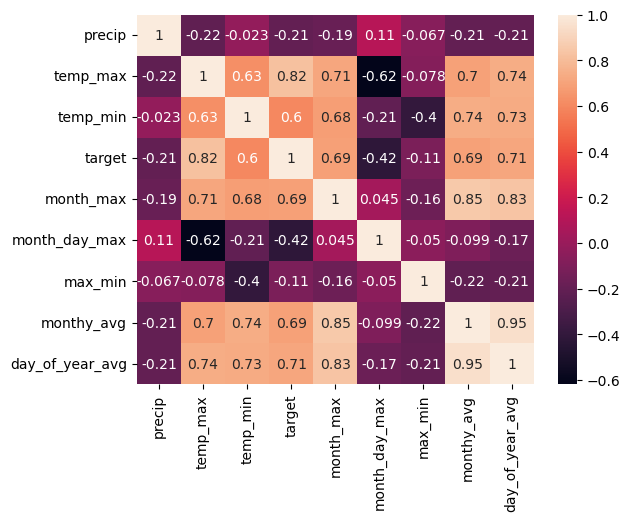

In [83]:
import seaborn as sns

correlation_matrix = core_weather.corr()
sns.heatmap(correlation_matrix, annot=True)

In [84]:
# Checando a diferença entre o valor real e o previsto pelo modelo
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2024-09-29,32.2,22.409100,9.790900
2024-07-01,33.9,24.287581,9.612419
2024-09-02,32.8,24.145520,8.654480
2024-06-10,29.4,20.792334,8.607666
2024-09-26,31.7,23.148278,8.551722
2023-08-29,32.8,24.300044,8.499956
2023-06-30,30.6,22.179505,8.420495
2023-08-19,30.0,21.691666,8.308334
2024-10-05,37.8,29.653305,8.146695


## Conclusion
The Ridge model, also known as Ridge Regression or Tikhonov regularization, proved to be effective in forecasting with an acceptable average error.

Our model was able to predict the maximum temperature of the next day based on data from previous days with a margin of error of 1.873 degrees Celsius. After adding new indicators, we were able to reduce the average error to 1.805, which is very good.

We learned and practiced how a linear regression model, under the supervised learning technique, works.

We calculated the Pearson correlation matrix to check other possible correlations and suggest new insights.

Further analyses are suggested to improve the model:

1. Instead of predicting just one day, one can try to predict an entire week;

2. Use data from multiple NOOA stations;

3. Use more indicators;

4. Use more than one ML model;

5. Use the test group of more than one year.